In [2]:
import  numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import model_selection,datasets,neighbors
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
def load_classification_data():
    digits=datasets.load_digits()
    X_train=digits.data
    y_train=digits.target

    return model_selection.train_test_split(X_train,y_train,test_size=0.25,random_state=0,stratify=y_train)


In [16]:
#添加噪声

def create_regression_data(n):
    X=5*np.random.rand(n,1)
    y=np.sin(X).ravel()
    y[::5]+=1*(0.5-np.random.rand(int(n/5)))
    return model_selection.train_test_split(X,y,test_size=0.25,random_state=0)
    

# KNN 分类

In [14]:
def test_KneighborsClassifier(*data):
    
    X_train,X_test,y_train,y_test=data 
    clf=neighbors.KNeighborsClassifier()
    clf.fit(X_train,y_train)
    print('Training Score:%.2f' %clf.score(X_train,y_train))
    print('Testing Score:%.2f' % clf.score(X_test,y_test))
    
X_train,X_test,y_train,y_test=load_classification_data() # 获取分类模型的数据集
test_KneighborsClassifier(X_train,X_test,y_train,y_test) # 调用 test_KNeighborsClassifier    

Training Score:0.99
Testing Score:0.98


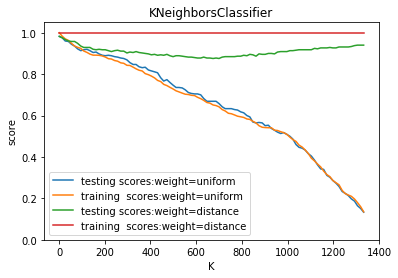

In [11]:
def test_KNeighborsClassifier_k_w(*data):
    '''测试K值以及投票策略对于预测性能的影响'''
    X_train,X_test,y_train,y_test=data 
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for weight  in weights :
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(weights=weight,n_neighbors=K)
            clf.fit(X_train,y_train)
            training_scores.append(clf.score(X_train,y_train))
            testing_scores.append(clf.score(X_test,y_test))
            
        ax.plot(Ks,testing_scores,label='testing scores:weight=%s' %weight)
        ax.plot(Ks,training_scores,label='training  scores:weight=%s' %weight)
        
    ax.legend(loc='best')
    ax.set_xlabel('K')
    ax.set_ylabel('score')

    ax.set_ylim(0,1.05)
    ax.set_title('KNeighborsClassifier')
    plt.show()
    
X_train,X_test,y_train,y_test=load_classification_data() # 获取分类模型的数据集
test_KNeighborsClassifier_k_w(X_train,X_test,y_train,y_test) # 调用 test_KNeighborsClassifier   
sns.set_style('whitegrid')

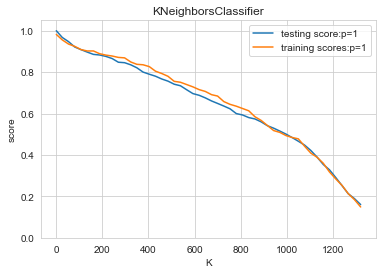

In [17]:
def test_KNeighborsClassiifer_k_p(*data):
    '''测试n_neighbors和p参数的影响'''
    X_train,X_test,y_train,y_train_test=data
    Ks=np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(p=P,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_train,y_train))
            training_scores.append(clf.score(X_test,y_test))
            
        ax.plot(Ks,testing_scores,label='testing score:p=%d' %P)
        ax.plot(Ks,training_scores,label='training scores:p=%d' %P )
        ax.legend(loc='best')
        ax.set_xlabel('K')
        ax.set_ylabel('score')
        ax.set_ylim(0,1.05)
        ax.set_title('KNeighborsClassifier')
        plt.show()
        
        
X_train,X_test,y_train,y_test=load_classification_data() # 获取分类模型的数据集
test_KNeighborsClassiifer_k_p(X_train,X_test,y_train,y_test) # 调用 test_KNeighborsClassifier   
sns.set_style('whitegrid')
            
        
    

# KNN 回归

In [20]:
def test_Kneighbors_Regressor(*data):
    X_train,X_test,y_train,y_test=data 
    regr=neighbors.KNeighborsRegressor()
    regr.fit(X_train,y_train)
    print('Training Score:%f' %regr.score(X_train,y_train))
    print('Testing Score:%f ' %regr.score(X_test,y_test))
    
    
X_train,X_test,y_train,y_test=create_regression_data(1000) # 获取回归模型的数据集
test_Kneighbors_Regressor(X_train,X_test,y_train,y_test) # 调用 test_KNeighborsClassifier   

                

Training Score:0.976115
Testing Score:0.962062 


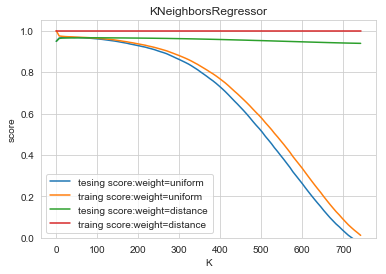

In [21]:
def test_Kneighbors_Regressor_k_w(*data):
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(weights=weight,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
            
        ax.plot(Ks,testing_scores,label='tesing score:weight=%s' %weight)
        ax.plot(Ks,training_scores,label='traing score:weight=%s ' %weight)

    ax.legend(loc='best')
    ax.set_xlabel('K')
    ax.set_ylabel('score')
    ax.set_ylim(0,1.05)
    ax.set_title('KNeighborsRegressor')
    plt.show()

    
    
X_train,X_test,y_train,y_test=create_regression_data(1000) # 获取回归模型的数据集
test_Kneighbors_Regressor_k_w(X_train,X_test,y_train,y_test) # 调用 test_KNeighborsClassifier  
sns.set_style('whitegrid')

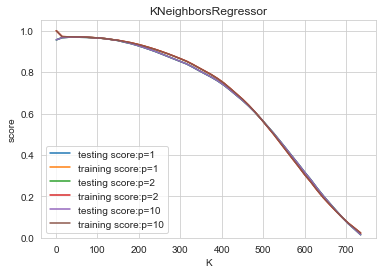

In [26]:
def test_KneighborsRegressor_k_p(*data):
    X_train,X_test,y_train,y_test=data 
    Ks=np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(p=P,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
            
        ax.plot(Ks,testing_scores,label='testing score:p=%d' %P)
        ax.plot(Ks,training_scores,label='training score:p=%d' %P)
        
        
    ax.legend(loc='best')
    ax.set_xlabel('K')
    ax.set_ylabel('score')
    ax.set_ylim(0,1.05)
    ax.set_title('KNeighborsRegressor')
    plt.show() 
    
X_train,X_test,y_train,y_test=create_regression_data(1000) # 获取回归模型的数据集
test_KneighborsRegressor_k_p(X_train,X_test,y_train,y_test) # 调用 test_KNeighborsClassifier  
sns.set_style('whitegrid')